In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [14]:
df_national_official = pd.read_csv('data/national_cdc_pandas_df.csv', index_col=0)

In [15]:
df_states_official = pd.read_csv('data/state_cdc_pandas_df.csv', index_col=0)

### Total Deaths by Year - Bar

In [16]:
annual_deaths = df_national_official.groupby('Calendar_Year').sum()[['Total_Deaths']]

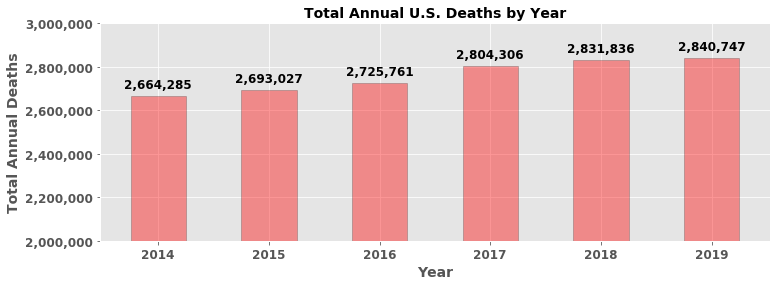

In [52]:
fig, ax = plt.subplots(figsize =(12,4))

x = annual_deaths.index[1:7]
y = annual_deaths.Total_Deaths[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Total Annual U.S. Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("Total Annual Deaths", fontsize = 14, fontweight="bold")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = format(int(y_value),',')

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_ylim([2000000,3000000])
plt.show()

In [53]:
weekly_deaths = df_national_official.groupby('Calendar_Year').mean()[['Total_Deaths']]

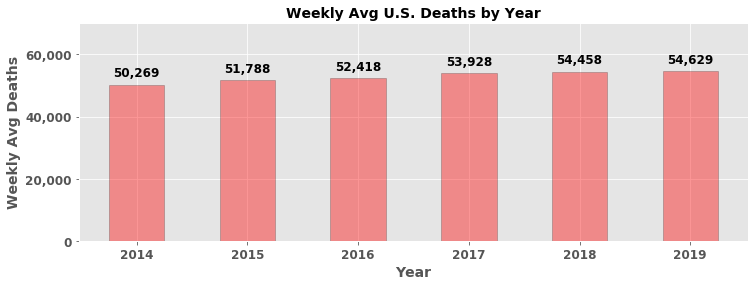

In [59]:
fig, ax = plt.subplots(figsize =(12,4))

x = weekly_deaths.index[1:7]
y = weekly_deaths.Total_Deaths[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Weekly Avg U.S. Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("Weekly Avg Deaths", fontsize = 14, fontweight="bold")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = format(int(y_value),',')

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_ylim([0,70000])
plt.show()

### Pct of Deaths by States - Vertical Bar

In [60]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2012-13,1,8.8,4,73,874,0.9,2013
1,Alabama,2012-13,2,9.3,12,100,1200,1.0,2013
2,Alabama,2012-13,3,10.0,8,102,1105,1.0,2013
3,Alabama,2012-13,4,9.8,4,100,1060,1.0,2013
4,Alabama,2012-13,5,8.3,2,83,1026,1.0,2013


In [89]:
mask = df_states_official['Calendar_Year'] == 2019

In [93]:
total_deaths_2019 = df_states_official[mask].sum()['Total_Deaths']

In [120]:
states_2019 = df_states_official[mask].groupby('State').sum()['Total_Deaths'].sort_values(ascending = False)

In [121]:
states_2019_df = pd.DataFrame(states_2019)

In [122]:
states_2019_df['%_Total_Deaths'] = states_2019_df['Total_Deaths']/total_deaths_2019

In [123]:
states_2019_df.head()

,Total_Deaths,%_Total_Deaths
State,,
California,268752,0.094606
Florida,206410,0.072660
Texas,202631,0.071330
Pennsylvania,132179,0.046530
Ohio,123311,0.043408


In [149]:
labels = states_2019_df.index[0:12]
state_deaths = states_2019_df['Total_Deaths'][0:12]
state_death_pct = states_2019_df['%_Total_Deaths'][0:12]

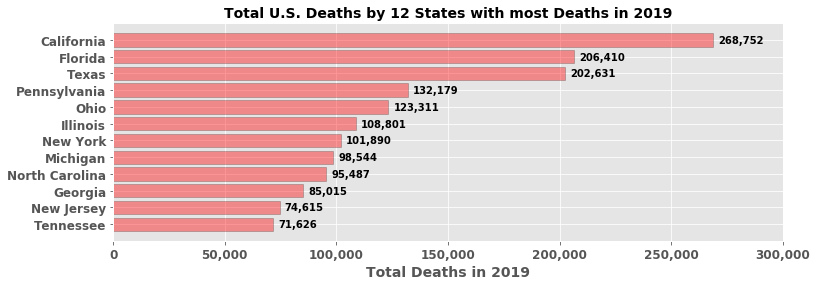

In [148]:
fig, ax = plt.subplots(figsize =(12,4))


y = np.arange(len(labels))


ax.barh(y, state_deaths, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("Total U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("Total Deaths in 2019", fontsize = 14, fontweight="bold")
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = format(int(x_value),',')

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,300000])

plt.show()

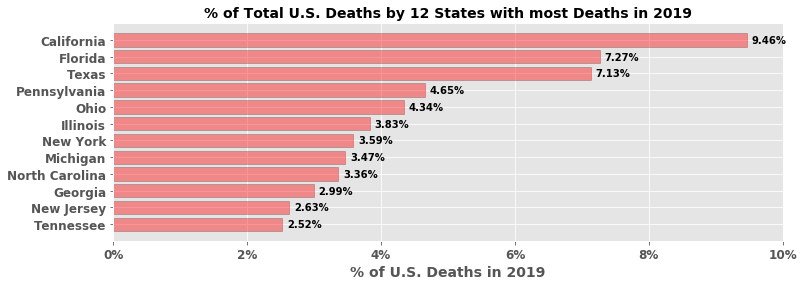

In [161]:
fig, ax = plt.subplots(figsize =(12,4))


y = np.arange(len(labels))


ax.barh(y, state_death_pct, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("% of Total U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("% of U.S. Deaths in 2019", fontsize = 14, fontweight="bold")
# ax.get_xaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:,.2%}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,.1])

plt.show()

In [162]:
df_states_official.head()

,State,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,Alabama,2012-13,1,8.8,4,73,874,0.9,2013
1,Alabama,2012-13,2,9.3,12,100,1200,1.0,2013
2,Alabama,2012-13,3,10.0,8,102,1105,1.0,2013
3,Alabama,2012-13,4,9.8,4,100,1060,1.0,2013
4,Alabama,2012-13,5,8.3,2,83,1026,1.0,2013


In [167]:
mask = (df_states_official['Percent_Complete'] == 1.0) & (df_states_official['Calendar_Year'] == 2019) 

In [172]:
states_2019_wk_avg = df_states_official[mask].groupby('State').mean()['Total_Deaths'].sort_values(ascending = False)

In [196]:
labels = states_2019_wk_avg.index[0:12]
state_death_avgs = states_2019_wk_avg.iloc[0:12]


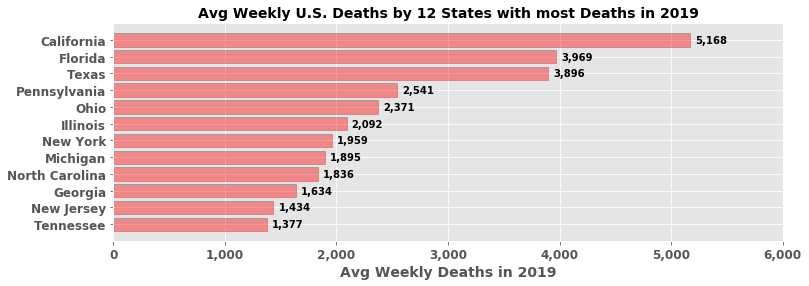

In [200]:
fig, ax = plt.subplots(figsize =(12,4))


y = np.arange(len(labels))


ax.barh(y, state_death_avgs, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("Avg Weekly U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("Avg Weekly Deaths in 2019", fontsize = 14, fontweight="bold")
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = format(int(x_value),',')

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,6000])

plt.show()

### Avg Deaths per Week by year - Line Graph

In [210]:
df_national_official.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,National,NaN,All,2013-14,40,6.8,6.4,6.6,3,3140,47492,0.998,2013,2014,2013
1,National,NaN,All,2013-14,41,6.9,6.5,6.7,12,3135,47304,0.994,2013,2014,2013
2,National,NaN,All,2013-14,42,7.0,6.6,6.8,11,3216,47602,1.000,2013,2014,2013
3,National,NaN,All,2013-14,43,7.1,6.7,6.6,11,3151,47746,1.000,2013,2014,2013
4,National,NaN,All,2013-14,44,7.2,6.8,6.7,12,3271,48777,1.000,2013,2014,2013


In [212]:
years = list(df_national_official['Calendar_Year'].unique())
years.sort()


In [245]:
colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

(40000, 70000)

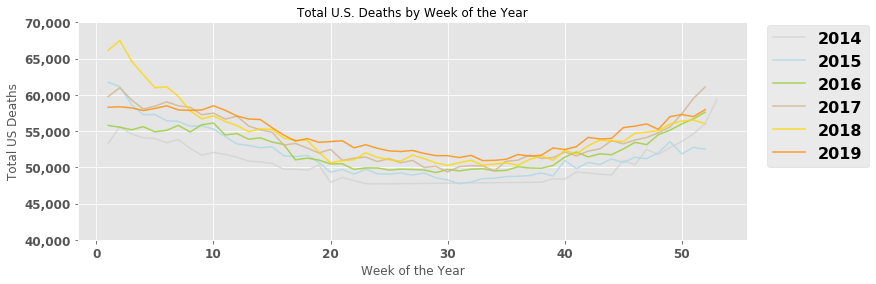

In [252]:
fig, ax = plt.subplots(figsize=(12, 4))


for year,color in zip(years[1:7],colors[0:6]):
    mask = (df_national_official['Calendar_Year'] == year) & (df_national_official['Percent_Complete'] == 1)
    df = df_national_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']
    
    if year == 2020:
        ax.plot(x,y, label = year, color = color,alpha =0.8, linewidth=3, zorder =2)
        ax.scatter(x, y, s=30, color=color, zorder=1)
    else:
        ax.plot(x,y, label = year, color = color, alpha =0.7, zorder =1)

    
plt.legend(bbox_to_anchor=(1.05, 0.9),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(y=50000, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year", fontsize = 12)
ax.set_xlabel("Week of the Year", fontsize = 12)
ax.set_ylabel("Total US Deaths", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])

In [257]:
mask = (df_national_official['Percent_Complete'] == 1) & (df_national_official['Calendar_Year'] == 2019)
median_wkly_deaths_2019 = int(df_national_official[mask].median()['Total_Deaths'])

(40000, 70000)

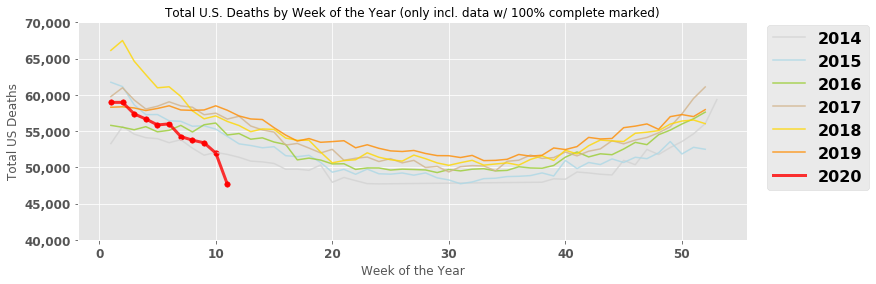

In [274]:
fig, ax = plt.subplots(figsize=(12, 4))


for year,color in zip(years[1:],colors):
    mask = (df_national_official['Calendar_Year'] == year) & (df_national_official['Percent_Complete'] == 1)
    df = df_national_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']
    
    if year == 2020:
        ax.plot(x,y, label = year, color = color,alpha =0.8, linewidth=3, zorder =2)
        ax.scatter(x, y, s=30, color=color, zorder=1)
    else:
        ax.plot(x,y, label = year, color = color, alpha =0.8, zorder =1)

    
plt.legend(bbox_to_anchor=(1.05, 0.9),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(median_wkly_deaths, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year (only incl. data w/ 100% complete marked)", fontsize = 12)
ax.set_xlabel("Week of the Year", fontsize = 12)
ax.set_ylabel("Total US Deaths", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])



### Bar Charts for 2020 vs. prior years by Week --> Hypothesis Tests

In [271]:
df_national_official.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,National,NaN,All,2013-14,40,6.8,6.4,6.6,3,3140,47492,0.998,2013,2014,2013
1,National,NaN,All,2013-14,41,6.9,6.5,6.7,12,3135,47304,0.994,2013,2014,2013
2,National,NaN,All,2013-14,42,7.0,6.6,6.8,11,3216,47602,1.000,2013,2014,2013
3,National,NaN,All,2013-14,43,7.1,6.7,6.6,11,3151,47746,1.000,2013,2014,2013
4,National,NaN,All,2013-14,44,7.2,6.8,6.7,12,3271,48777,1.000,2013,2014,2013


In [284]:
week_labels = list(df_national_official['Week'].unique())

In [291]:
week_labels.sort()
weeks_to_11 = week_labels[:11]

In [292]:
death_lst = []
year_lst = []
week_lst = []

for i in range(1,len(weeks_to_11[0:11])+1):
    for year in years[1:]:
        mask = (df_national_official['Week'] == i) & (df_national_official['Calendar_Year'] == year)
        df = df_national_official[mask]
        death_lst.append(df['Total_Deaths'].iloc[0])
        year_lst.append(year)
        week_lst.append(i)

In [294]:
y_w_d = []
for y, w, d in zip(year_lst,week_lst,death_lst):
    y_w_d.append((y,w,d))

In [295]:
deaths_2014 = []
deaths_2015 = []
deaths_2016 = []
deaths_2017 = []
deaths_2018 = []
deaths_2019 = []
deaths_2020 = [] 

for y,w,d in y_w_d:
    if y == 2014:
        deaths_2014.append(d)
    elif y == 2015:
        deaths_2015.append(d)
    elif y == 2016:
        deaths_2016.append(d)
    elif y == 2017:
        deaths_2017.append(d)
    elif y == 2018:
        deaths_2018.append(d)
    elif y == 2019:
        deaths_2019.append(d)
    elif y == 2020:
        deaths_2020.append(d)

In [296]:
deaths_2020

[58961, 58962, 57371, 56666, 55849, 55992, 54246, 53745, 53382, 51978, 47655]

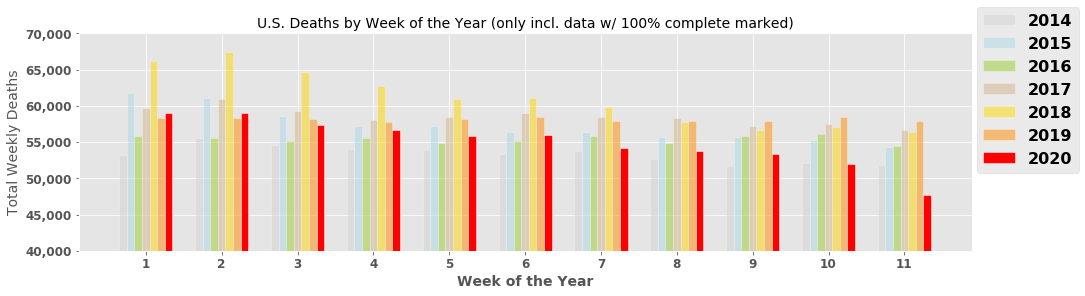

In [310]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.10
 
# set height of bar
bars1 = deaths_2014
bars2 = deaths_2015
bars3 = deaths_2016
bars4 = deaths_2017
bars5 = deaths_2018
bars6 = deaths_2019
bars7 = deaths_2020


weeks = weeks_to_11

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 

colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2014', color = colors[0], alpha = 0.5)
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2015', color = colors[1], alpha = 0.5)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2016', color = colors[2], alpha = 0.5)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', color = colors[3], alpha = 0.5)
ax.bar(r5, bars5,  width=barWidth, edgecolor='white', label='2018', color = colors[4], alpha = 0.5)
ax.bar(r6, bars6,  width=barWidth, edgecolor='white', label='2019', color = colors[5], alpha = 0.5)
ax.bar(r7, bars7,  width=barWidth, edgecolor='white', label='2020', color = colors[6] ,alpha = 1.0)


 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth+0.2 for r in range(len(bars1))], weeks)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("U.S. Deaths by Week of the Year (only incl. data w/ 100% complete marked)", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Weekly Deaths", fontsize = 14)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylim([40000,70000])
plt.show()

In [311]:
deaths_2020

[58961, 58962, 57371, 56666, 55849, 55992, 54246, 53745, 53382, 51978, 47655]

In [312]:
deaths_2019

[58289, 58351, 58193, 57834, 58122, 58489, 57915, 57856, 57915, 58488, 57869]

In [313]:
deaths_2020 - deaths_2019

TypeError: unsupported operand type(s) for -: 'list' and 'list'

### Distribution of Deaths by Week

### % Flu & Pneumonia Deaths by Week --> Hypothesis Tests

### Distribution of % Flu & Pneumonia Deaths 

### Covid Death Rise

### % Covid Death compared to %Flu & Pneumonia